Sentiment Analysis for LinkedIn Reviews using TextBlob


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk


In [2]:
df=pd.read_csv("/content/linkedin-reviews.csv")

In [3]:
df.head() #dataset(reviews for linkedIn app)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [6]:
import seaborn as sns

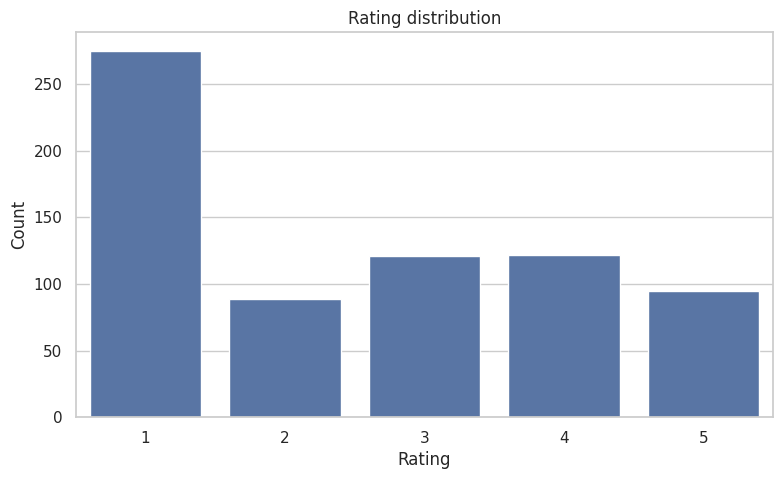

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
sns.countplot(data=df,x="Rating")
plt.title("Rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [15]:
df['Length']=df["Review"].apply(len)

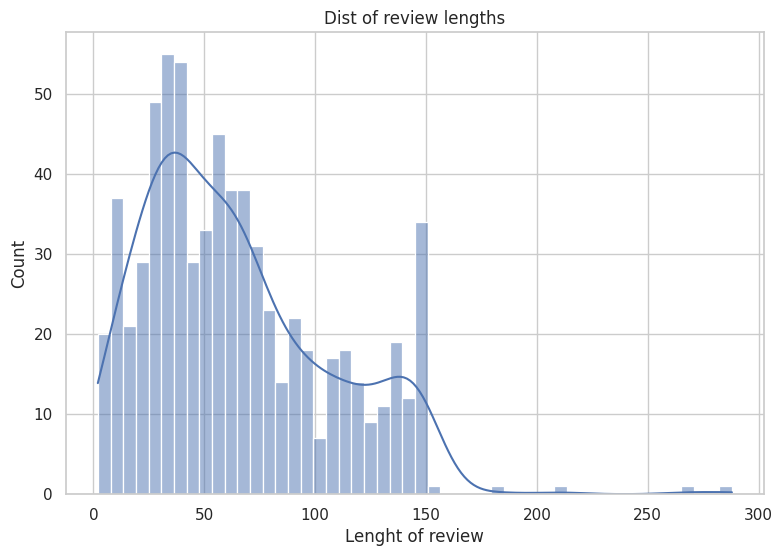

In [17]:
plt.figure(figsize=(9,6))
sns.histplot(df["Length"],bins=50,kde=True)
plt.title("Dist of review lengths")
plt.xlabel("Lenght of review")
plt.ylabel("Count")
plt.show()

In [22]:
!pip install textblob

In [25]:
from textblob import TextBlob


In [38]:
def sentiment_analysis(review):
  sentiment=TextBlob(review).sentiment
  if sentiment.polarity>0.1:
    return "Positive"
  elif sentiment.polarity<-0.1:
    return "Negative"
  else:
    return "Neutral"


In [39]:
df["Sentiment"]=df["Review"].apply(sentiment_analysis)

In [40]:
df.head(5)

,Review,Rating,Length,sentiment,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative,Negative
1,Force close(galaxy tab),1,23,neutral,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative,Negative
3,Add ability to customize the profile and move ...,4,90,neutral,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive,Positive


In [41]:
df["Sentiment"].value_counts()

Sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

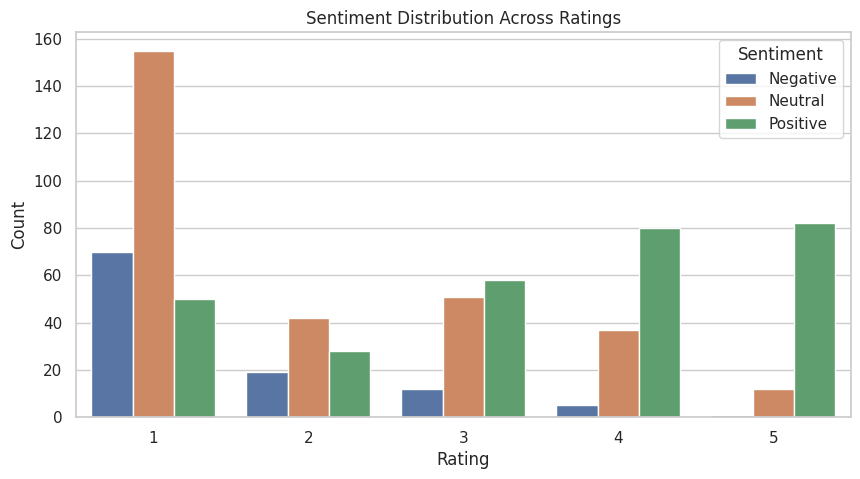

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

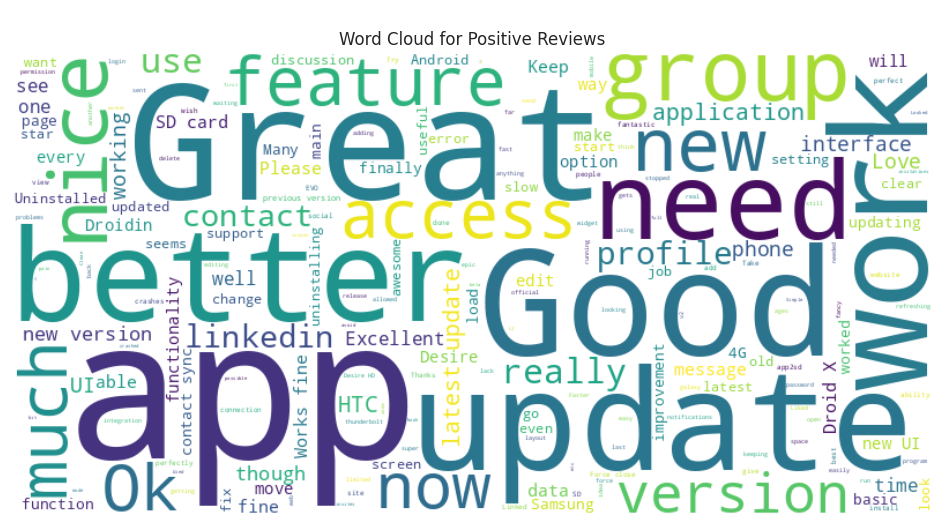

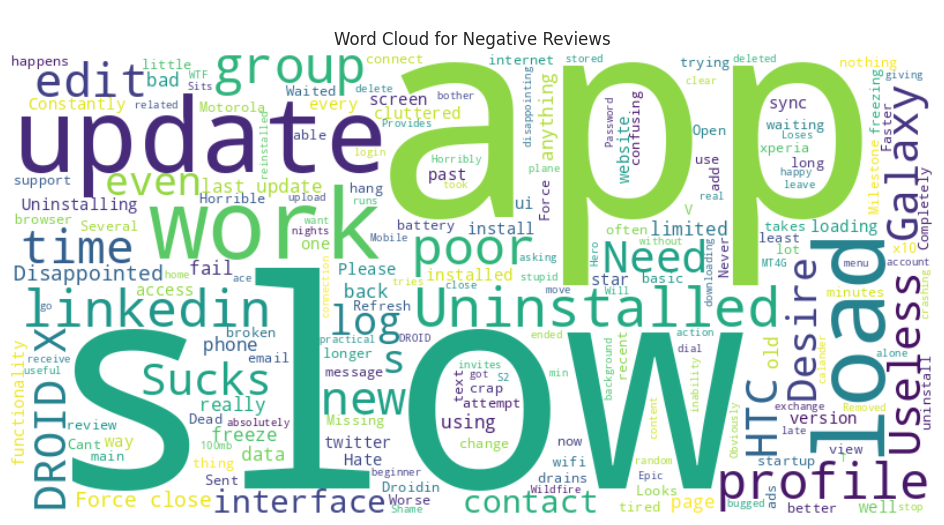

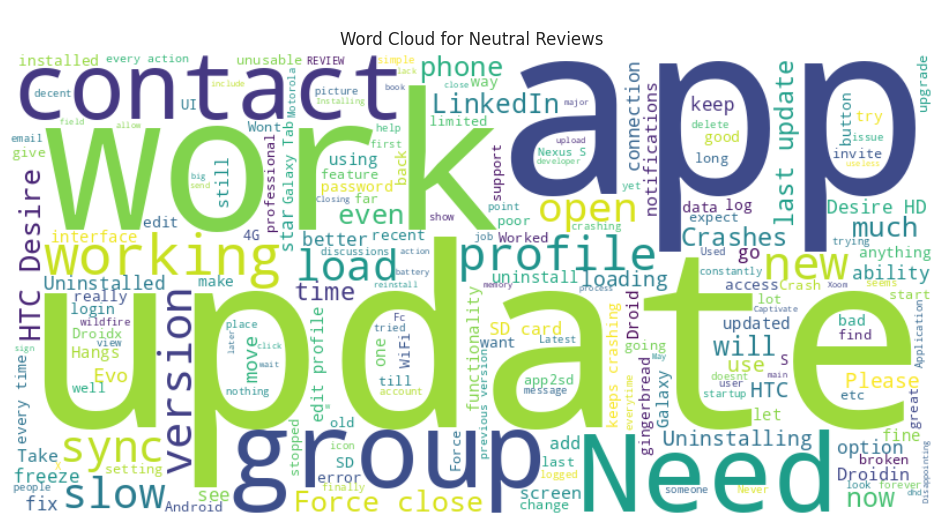

In [50]:
from wordcloud import WordCloud


def word_cloud(sentiment):
  text=" ".join(review for review in df[df['Sentiment']==sentiment]['Review'])
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
  plt.figure(figsize=(15,6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'\nWord Cloud for {sentiment} Reviews')
  plt.axis('off')
  plt.show()

for sentiment in["Positive","Negative","Neutral"]:
    word_cloud(sentiment)



